In [1]:
# Import 
# Daten lesen
# Daten formatieren
# Model erstellen
# Model trainieren
# Model auswerten

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import sklearn
print(sklearn.__version__)

1.2.1


In [5]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [6]:
import keras 
print(keras.__version__)

2.15.0


## Iris mit Neuronalen Netzwerken

In [115]:
from sklearn.datasets import load_iris
iris = load_iris()

In [116]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [117]:
colors = 'bwr'#['b','y','r']
CMAP = colors#plt.cm.rainbow

In [118]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

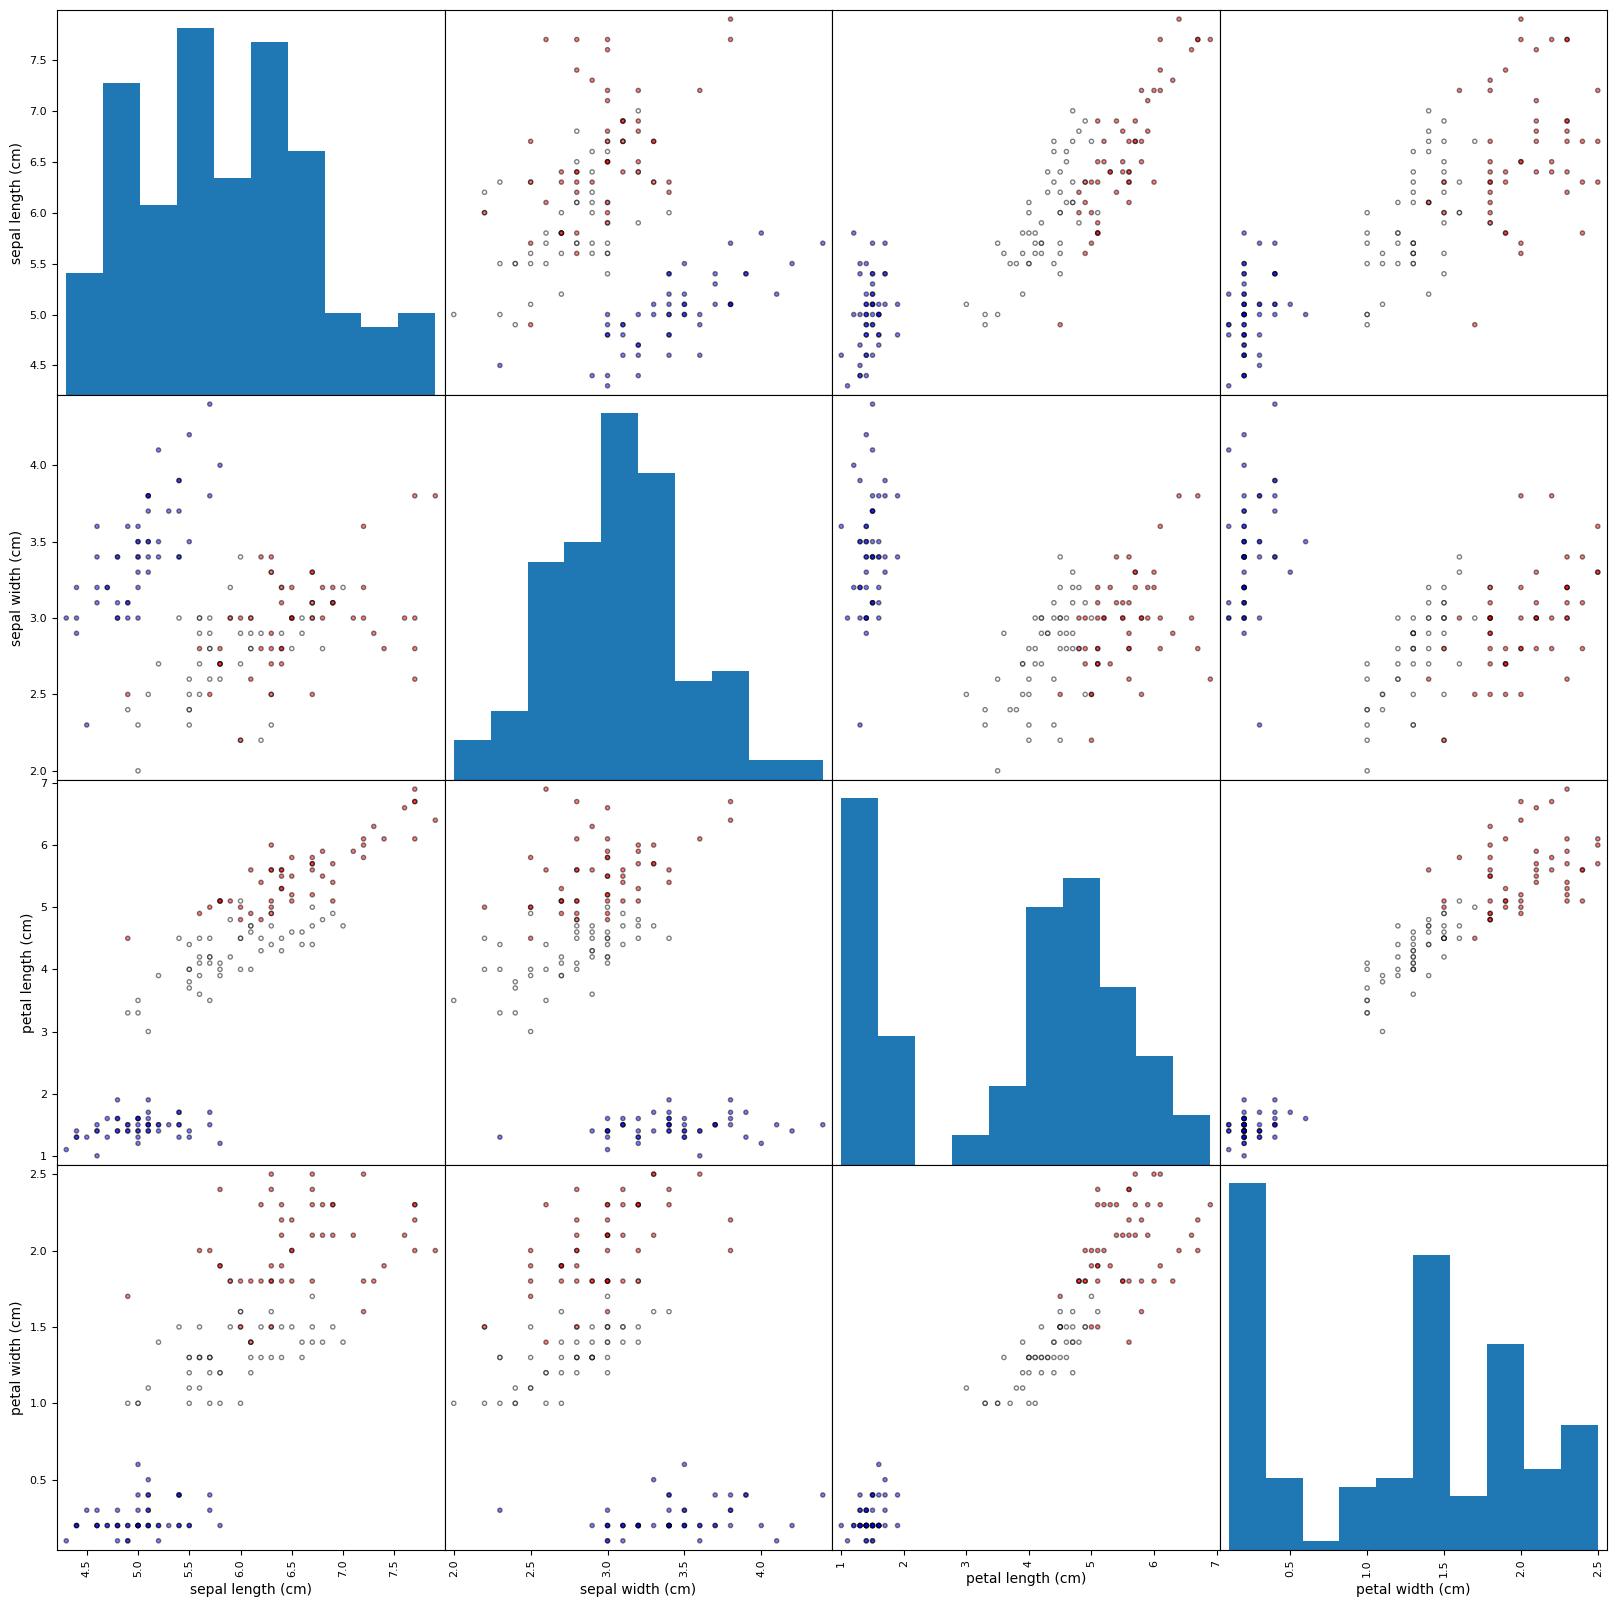

In [119]:
pd.plotting.scatter_matrix(iris_df, c=iris.target, cmap=CMAP, edgecolors='black', figsize=(20, 20))

In [120]:
plt.savefig('ML_IRIS.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

### Küsntliche Neuron ohne Aktivierungsfunktion

In [121]:
w0 = 3
w1 = -4
w2 = 2

def neuron_no_activation(x1, x2):
    """ 
    Berechnung einer Ausgabe von küsntliche Neuron
    """
    sum = w0 + w1 * x1 + w2 * x2
    return sum


print(f'Iris erste Reihe: {iris.data[0]}')

sum = neuron_no_activation(5.1, 3.5)
print(f'Die Lösung: {sum}')

Iris erste Reihe: [5.1 3.5 1.4 0.2]
Die Lösung: -10.399999999999999


### Küsntliche Neuron mit Aktivierungsfunktion

In [122]:
def centerAxis(uses_negative=False):
    # http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot
    ax = plt.gca()
    ax.spines['left'].set_position('center')
    if uses_negative:
        ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

#### Step Function: abrupter, nicht stetig differenzierbarer Übergang zwischen 0 und 1

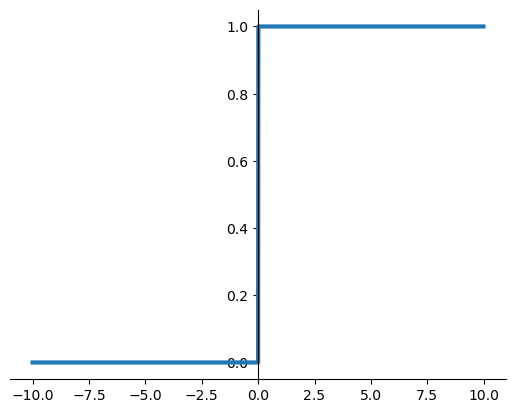

In [123]:
def np_step(X):
    """
    Step Funktion
    """
    return 0.5 * (np.sign(X) + 1)


x = np.arange(-10,10,0.01)
y = np_step(x)

centerAxis()
plt.plot(x, y, lw=3)

#### Sigmoid Function: Fließender Übergang zwischen 0 und 1

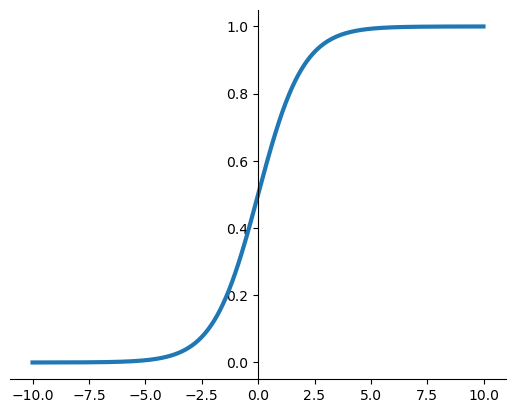

In [124]:
def np_sigmoid(X):
    """
    Sigmoid Function: Fließender Übergang zwischen 0 und 1
    """
    return 1/(1 + np.exp(X * -1))


x = np.arange(-10,10,0.01)
y = np_sigmoid(x)

centerAxis()
plt.plot(x,y,lw=3)

#### Tangens Hyperbolicus Function: Fließender Übergang zwischen -1 und 1

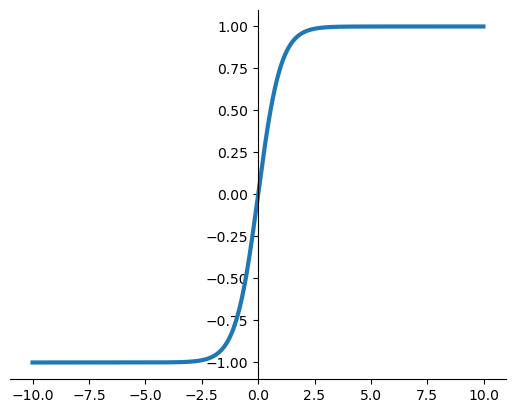

In [125]:
x = np.arange(-10,10,0.01)
y = np.tanh(x)

centerAxis()
plt.plot(x,y,lw=3)

#### Relu: Einfach zu berechnen, setzt kompletten negativen Wertebereich auf 0

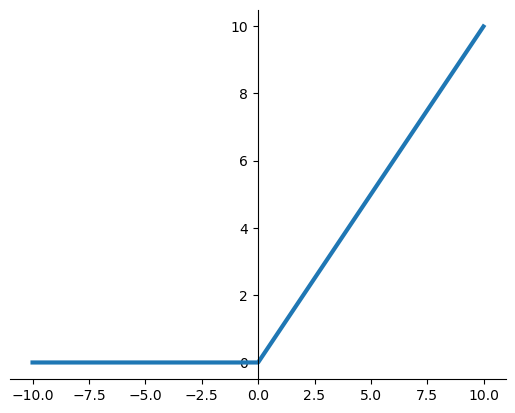

In [126]:
def np_relu(x):
    """
    Relu: Einfach zu berechnen, setzt kompletten negativen Wertebereich auf 0
    """
    return np.maximum(0, x)



x = np.arange(-10,10,0.01)
y = np_relu(x)

centerAxis()
plt.plot(x,y,lw=3)

In [127]:
import math as math

def sigmoid(x):
    """
    Sigmoidfunktion
    """
    
    return 1 / (1 + math.exp(x * -1))

w0 = 3
w1 = -4
w2 = 2


# Künstliche Neuron mit Aktivierungsfunktion
def neuron(x1, x2):
    """
    Künstliche Neuron mit Aktivierungsfunktion
    """
    sum = w0 + w1 * x1 + w2 * x2
    return sigmoid(sum)

In [128]:
neuron(5.1, 3.5)

3.043155690056538e-05

In [129]:
weights_with_bias = np.array([3, -4, 2 ])

def np_neuron(X):
    inputs_with_1_for_bias = np.concatenate((np.array([1]), X))
    return np_sigmoid(np.sum(inputs_with_1_for_bias*weights_with_bias))

np_neuron(np.array([5.1, 3.5]))

3.043155690056538e-05

## Der erste Neuronales Netz mit Keras

In [130]:
from keras.layers import Input
inputs = Input(shape=(4, ))

In [131]:
from keras.layers import Dense 
fc = Dense(3)(inputs)

In [132]:
from keras.models import Model
model = Model(inputs=inputs, outputs=fc)

In [133]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 15        
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [134]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [135]:
model.predict(np.array([[5.1, 3.5, 1.4, 0.2]]))

1/1 [==============================] - 0s 28ms/step


array([[-1.2483308,  2.0488167, -4.4149756]], dtype=float32)

In [136]:
inputs = Input(shape=(4, )) # Wir haben 4 Inputs Features
fc = Dense(3)(inputs)
predictions = Dense(3, activation='softmax')(fc) # 3 weil wir zwischen 3 Klassen unterscheiden wollen
model = Model(inputs=inputs, outputs=predictions)

In [137]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_6 (Dense)             (None, 3)                 15        
                                                                 
 dense_7 (Dense)             (None, 3)                 12        
                                                                 
Total params: 27 (108.00 Byte)
Trainable params: 27 (108.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [157]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [158]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

1/1 [==============================] - 0s 27ms/step


array([[0.03942887, 0.9376521 , 0.02291909]], dtype=float32)

## Training

In [159]:
X = np.array(iris.data)
y = np.array(iris.target)
X.shape, y.shape

((150, 4), (150,))

#### One Hot Encoding

In [161]:
y[100]

2

In [162]:
from keras.utils import to_categorical

num_categories = 3

y = to_categorical(y, num_categories)

In [163]:
y[100]

array([0., 0., 1.], dtype=float32)

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [165]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [167]:
%time model.fit(X_train, y_train, epochs=500, validation_split=0.3,)
    #batch_size=1000)

Epoch 1/500
3/3 [==============================] - 0s 16ms/step - loss: 2.4446 - accuracy: 0.3214 - val_loss: 2.2598 - val_accuracy: 0.3611
Epoch 2/500
3/3 [==============================] - 0s 6ms/step - loss: 2.3722 - accuracy: 0.3214 - val_loss: 2.1934 - val_accuracy: 0.3611
Epoch 3/500
3/3 [==============================] - 0s 6ms/step - loss: 2.3024 - accuracy: 0.3214 - val_loss: 2.1288 - val_accuracy: 0.3611
Epoch 4/500
3/3 [==============================] - 0s 6ms/step - loss: 2.2362 - accuracy: 0.3214 - val_loss: 2.0662 - val_accuracy: 0.3611
Epoch 5/500
3/3 [==============================] - 0s 6ms/step - loss: 2.1673 - accuracy: 0.3214 - val_loss: 2.0069 - val_accuracy: 0.3611
Epoch 6/500
3/3 [==============================] - 0s 6ms/step - loss: 2.1054 - accuracy: 0.3214 - val_loss: 1.9500 - val_accuracy: 0.3611
Epoch 7/500
3/3 [==============================] - 0s 6ms/step - loss: 2.0426 - accuracy: 0.3214 - val_loss: 1.8962 - val_accuracy: 0.3611
Epoch 8/500
3/3 [=========

3/3 [==============================] - 0s 6ms/step - loss: 1.0688 - accuracy: 0.5952 - val_loss: 1.0610 - val_accuracy: 0.5556
Epoch 60/500
3/3 [==============================] - 0s 6ms/step - loss: 1.0638 - accuracy: 0.5833 - val_loss: 1.0577 - val_accuracy: 0.5556
Epoch 61/500
3/3 [==============================] - 0s 5ms/step - loss: 1.0600 - accuracy: 0.5714 - val_loss: 1.0546 - val_accuracy: 0.5556
Epoch 62/500
3/3 [==============================] - 0s 5ms/step - loss: 1.0554 - accuracy: 0.5833 - val_loss: 1.0516 - val_accuracy: 0.5556
Epoch 63/500
3/3 [==============================] - 0s 6ms/step - loss: 1.0517 - accuracy: 0.5714 - val_loss: 1.0485 - val_accuracy: 0.5556
Epoch 64/500
3/3 [==============================] - 0s 5ms/step - loss: 1.0478 - accuracy: 0.5476 - val_loss: 1.0456 - val_accuracy: 0.5278
Epoch 65/500
3/3 [==============================] - 0s 5ms/step - loss: 1.0448 - accuracy: 0.5476 - val_loss: 1.0428 - val_accuracy: 0.5278
Epoch 66/500
3/3 [===============

3/3 [==============================] - 0s 6ms/step - loss: 0.9098 - accuracy: 0.4881 - val_loss: 0.9330 - val_accuracy: 0.4167
Epoch 118/500
3/3 [==============================] - 0s 5ms/step - loss: 0.9073 - accuracy: 0.4881 - val_loss: 0.9310 - val_accuracy: 0.4167
Epoch 119/500
3/3 [==============================] - 0s 6ms/step - loss: 0.9048 - accuracy: 0.4881 - val_loss: 0.9288 - val_accuracy: 0.4167
Epoch 120/500
3/3 [==============================] - 0s 5ms/step - loss: 0.9024 - accuracy: 0.4881 - val_loss: 0.9269 - val_accuracy: 0.4167
Epoch 121/500
3/3 [==============================] - 0s 5ms/step - loss: 0.8999 - accuracy: 0.4881 - val_loss: 0.9249 - val_accuracy: 0.4167
Epoch 122/500
3/3 [==============================] - 0s 6ms/step - loss: 0.8974 - accuracy: 0.5000 - val_loss: 0.9230 - val_accuracy: 0.4167
Epoch 123/500
3/3 [==============================] - 0s 6ms/step - loss: 0.8949 - accuracy: 0.5000 - val_loss: 0.9210 - val_accuracy: 0.4444
Epoch 124/500
3/3 [========

3/3 [==============================] - 0s 5ms/step - loss: 0.7678 - accuracy: 0.5000 - val_loss: 0.8088 - val_accuracy: 0.5000
Epoch 176/500
3/3 [==============================] - 0s 5ms/step - loss: 0.7653 - accuracy: 0.5000 - val_loss: 0.8068 - val_accuracy: 0.5000
Epoch 177/500
3/3 [==============================] - 0s 6ms/step - loss: 0.7631 - accuracy: 0.5000 - val_loss: 0.8049 - val_accuracy: 0.5000
Epoch 178/500
3/3 [==============================] - 0s 5ms/step - loss: 0.7610 - accuracy: 0.5000 - val_loss: 0.8029 - val_accuracy: 0.5000
Epoch 179/500
3/3 [==============================] - 0s 6ms/step - loss: 0.7587 - accuracy: 0.5000 - val_loss: 0.8007 - val_accuracy: 0.5000
Epoch 180/500
3/3 [==============================] - 0s 5ms/step - loss: 0.7564 - accuracy: 0.5000 - val_loss: 0.7986 - val_accuracy: 0.5000
Epoch 181/500
3/3 [==============================] - 0s 6ms/step - loss: 0.7542 - accuracy: 0.5000 - val_loss: 0.7967 - val_accuracy: 0.5000
Epoch 182/500
3/3 [========

3/3 [==============================] - 0s 5ms/step - loss: 0.6536 - accuracy: 0.5357 - val_loss: 0.7001 - val_accuracy: 0.5000
Epoch 234/500
3/3 [==============================] - 0s 5ms/step - loss: 0.6520 - accuracy: 0.5357 - val_loss: 0.6985 - val_accuracy: 0.5278
Epoch 235/500
3/3 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.5357 - val_loss: 0.6972 - val_accuracy: 0.5278
Epoch 236/500
3/3 [==============================] - 0s 6ms/step - loss: 0.6487 - accuracy: 0.5357 - val_loss: 0.6957 - val_accuracy: 0.5278
Epoch 237/500
3/3 [==============================] - 0s 5ms/step - loss: 0.6472 - accuracy: 0.5357 - val_loss: 0.6941 - val_accuracy: 0.5278
Epoch 238/500
3/3 [==============================] - 0s 5ms/step - loss: 0.6456 - accuracy: 0.5357 - val_loss: 0.6927 - val_accuracy: 0.5278
Epoch 239/500
3/3 [==============================] - 0s 5ms/step - loss: 0.6441 - accuracy: 0.5357 - val_loss: 0.6912 - val_accuracy: 0.5278
Epoch 240/500
3/3 [========

3/3 [==============================] - 0s 5ms/step - loss: 0.5751 - accuracy: 0.6190 - val_loss: 0.6191 - val_accuracy: 0.5833
Epoch 292/500
3/3 [==============================] - 0s 6ms/step - loss: 0.5739 - accuracy: 0.6190 - val_loss: 0.6180 - val_accuracy: 0.5833
Epoch 293/500
3/3 [==============================] - 0s 6ms/step - loss: 0.5731 - accuracy: 0.6310 - val_loss: 0.6170 - val_accuracy: 0.5833
Epoch 294/500
3/3 [==============================] - 0s 5ms/step - loss: 0.5717 - accuracy: 0.6310 - val_loss: 0.6158 - val_accuracy: 0.5833
Epoch 295/500
3/3 [==============================] - 0s 5ms/step - loss: 0.5706 - accuracy: 0.6310 - val_loss: 0.6146 - val_accuracy: 0.5833
Epoch 296/500
3/3 [==============================] - 0s 6ms/step - loss: 0.5695 - accuracy: 0.6310 - val_loss: 0.6134 - val_accuracy: 0.5833
Epoch 297/500
3/3 [==============================] - 0s 5ms/step - loss: 0.5685 - accuracy: 0.6310 - val_loss: 0.6122 - val_accuracy: 0.5833
Epoch 298/500
3/3 [========

3/3 [==============================] - 0s 6ms/step - loss: 0.5186 - accuracy: 0.6667 - val_loss: 0.5557 - val_accuracy: 0.6111
Epoch 350/500
3/3 [==============================] - 0s 6ms/step - loss: 0.5177 - accuracy: 0.6667 - val_loss: 0.5547 - val_accuracy: 0.6111
Epoch 351/500
3/3 [==============================] - 0s 5ms/step - loss: 0.5168 - accuracy: 0.6667 - val_loss: 0.5536 - val_accuracy: 0.6667
Epoch 352/500
3/3 [==============================] - 0s 5ms/step - loss: 0.5161 - accuracy: 0.6667 - val_loss: 0.5526 - val_accuracy: 0.6667
Epoch 353/500
3/3 [==============================] - 0s 5ms/step - loss: 0.5151 - accuracy: 0.6667 - val_loss: 0.5517 - val_accuracy: 0.6667
Epoch 354/500
3/3 [==============================] - 0s 6ms/step - loss: 0.5144 - accuracy: 0.6667 - val_loss: 0.5510 - val_accuracy: 0.6111
Epoch 355/500
3/3 [==============================] - 0s 6ms/step - loss: 0.5134 - accuracy: 0.6667 - val_loss: 0.5501 - val_accuracy: 0.6111
Epoch 356/500
3/3 [========

3/3 [==============================] - 0s 5ms/step - loss: 0.4723 - accuracy: 0.7262 - val_loss: 0.5020 - val_accuracy: 0.7500
Epoch 408/500
3/3 [==============================] - 0s 7ms/step - loss: 0.4717 - accuracy: 0.7262 - val_loss: 0.5009 - val_accuracy: 0.7500
Epoch 409/500
3/3 [==============================] - 0s 6ms/step - loss: 0.4708 - accuracy: 0.7262 - val_loss: 0.4999 - val_accuracy: 0.7500
Epoch 410/500
3/3 [==============================] - 0s 5ms/step - loss: 0.4700 - accuracy: 0.7381 - val_loss: 0.4990 - val_accuracy: 0.7500
Epoch 411/500
3/3 [==============================] - 0s 5ms/step - loss: 0.4693 - accuracy: 0.7381 - val_loss: 0.4980 - val_accuracy: 0.7500
Epoch 412/500
3/3 [==============================] - 0s 5ms/step - loss: 0.4685 - accuracy: 0.7381 - val_loss: 0.4971 - val_accuracy: 0.7500
Epoch 413/500
3/3 [==============================] - 0s 5ms/step - loss: 0.4677 - accuracy: 0.7381 - val_loss: 0.4963 - val_accuracy: 0.7500
Epoch 414/500
3/3 [========

3/3 [==============================] - 0s 5ms/step - loss: 0.4297 - accuracy: 0.8333 - val_loss: 0.4501 - val_accuracy: 0.8056
Epoch 466/500
3/3 [==============================] - 0s 6ms/step - loss: 0.4291 - accuracy: 0.8452 - val_loss: 0.4494 - val_accuracy: 0.8056
Epoch 467/500
3/3 [==============================] - 0s 6ms/step - loss: 0.4284 - accuracy: 0.8452 - val_loss: 0.4486 - val_accuracy: 0.8056
Epoch 468/500
3/3 [==============================] - 0s 7ms/step - loss: 0.4277 - accuracy: 0.8452 - val_loss: 0.4478 - val_accuracy: 0.8056
Epoch 469/500
3/3 [==============================] - 0s 6ms/step - loss: 0.4268 - accuracy: 0.8452 - val_loss: 0.4472 - val_accuracy: 0.8056
Epoch 470/500
3/3 [==============================] - 0s 5ms/step - loss: 0.4262 - accuracy: 0.8452 - val_loss: 0.4465 - val_accuracy: 0.8056
Epoch 471/500
3/3 [==============================] - 0s 5ms/step - loss: 0.4256 - accuracy: 0.8452 - val_loss: 0.4460 - val_accuracy: 0.8056
Epoch 472/500
3/3 [========

## Bewertung

In [170]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

1/1 [==============================] - 0s 14ms/step


array([[0.9725627 , 0.02556354, 0.00187379]], dtype=float32)

In [172]:
X[0], y[0]

(array([5.1, 3.5, 1.4, 0.2]), array([1., 0., 0.], dtype=float32))

In [175]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
train_loss, train_accuracy

4/4 [==============================] - 0s 1ms/step - loss: 0.4093 - accuracy: 0.8917


(0.4092826247215271, 0.8916666507720947)

In [176]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
test_loss, test_accuracy

1/1 [==============================] - 0s 16ms/step - loss: 0.3855 - accuracy: 0.9333


(0.38552987575531006, 0.9333333373069763)

### Comfusion Matrix

In [178]:
%time pred = model.predict(X_test)

1/1 [==============================] - 0s 14ms/step
CPU times: user 47.7 ms, sys: 3.92 ms, total: 51.6 ms
Wall time: 47.9 ms


In [185]:
pred[5]

array([0.02078084, 0.57872725, 0.4004919 ], dtype=float32)

In [186]:
np.argmax(pred[5])

1

In [187]:
np.argmax(pred, axis=1)

array([2, 0, 1, 1, 2, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 2, 0,
       2, 0, 0, 2, 1, 2, 0, 2])

In [193]:
y_true = pd.Series(np.argmax(y_test, axis=1), name='actuel')
y_pred = pd.Series(np.argmax(pred, axis=1), name='pred')

y_true.shape, y_pred.shape

((30,), (30,))

In [195]:
pd.crosstab(y_true, y_pred)

pred,0,1,2
actuel,,,
0,10,0,0
1,0,8,2
2,0,0,10
